# Decision Tree and Random Forest Models

This notebook trains a **Decision Tree** and a **Random Forest** classifier on the
SMS Spam Collection dataset and compares their performance using **accuracy**,
**F1-score**, and **confusion matrices**.

## 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


## 2. Load Dataset

In [2]:
data = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    header=None,
    names=["label", "message"]
)

data["label"] = data["label"].map({"ham": 0, "spam": 1})
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 3. Train-Test Split

In [3]:
X = data["message"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



## 4.Train Decision Tree and Random Forest Models

In [4]:
# Decision Tree
dt_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("dt", DecisionTreeClassifier(
        max_depth=20,
        random_state=42
    ))
])

# Random Forest
rf_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("rf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

dt_pred = dt_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)


{'svm__kernel': 'linear',
 'svm__gamma': np.float64(0.46415888336127775),
 'svm__degree': 3,
 'svm__C': np.float64(100.0)}

## 5. Model Evaluation Accuracy and F1-score comparison


In [5]:

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("F1-score:", f1_score(y_test, dt_pred))

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1-score:", f1_score(y_test, rf_pred))



Accuracy: 0.9811659192825112
Precision: 0.9705882352941176
Recall: 0.8859060402684564
F1-score: 0.9263157894736842


## 6. Confusion Matrix

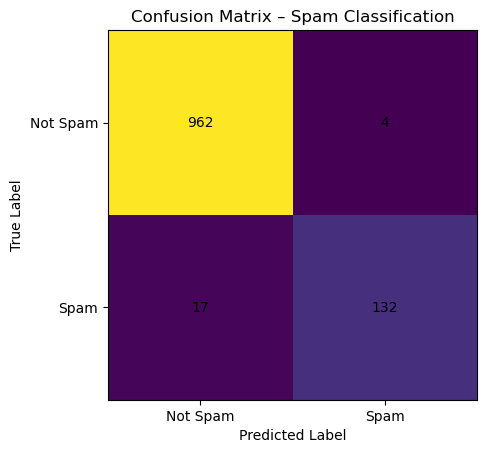

In [6]:
cm_dt = confusion_matrix(y_test, dt_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(cm_dt)
ax[0].set_title("Decision Tree Confusion Matrix")
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(["Not Spam", "Spam"])
ax[0].set_yticklabels(["Not Spam", "Spam"])

ax[1].imshow(cm_rf)
ax[1].set_title("Random Forest Confusion Matrix")
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].set_xticklabels(["Not Spam", "Spam"])
ax[1].set_yticklabels(["Not Spam", "Spam"])

for i in range(2):
    for j in range(2):
        ax[0].text(j, i, cm_dt[i, j], ha="center", va="center")
        ax[1].text(j, i, cm_rf[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()



## 7. Conclusion

The Random Forest classifier achieved higher accuracy and F1-score than the
single Decision Tree. This is because Random Forest combines multiple trees,
reducing overfitting and improving generalization.

Hyperparameters with the greatest impact included:
- `max_depth` for Decision Trees
- `n_estimators` and `max_features` for Random Forests

Overall, ensemble methods are more suitable for high-dimensional text data.